# Create Mathematical Animations Using Manim

In [1]:
import jupyter_manim
from manim import *
import numpy as np
from moviepy.editor import *

Manim Community v0.18.0

In [2]:
config.media_width = "60%"
config.background_color = PURPLE

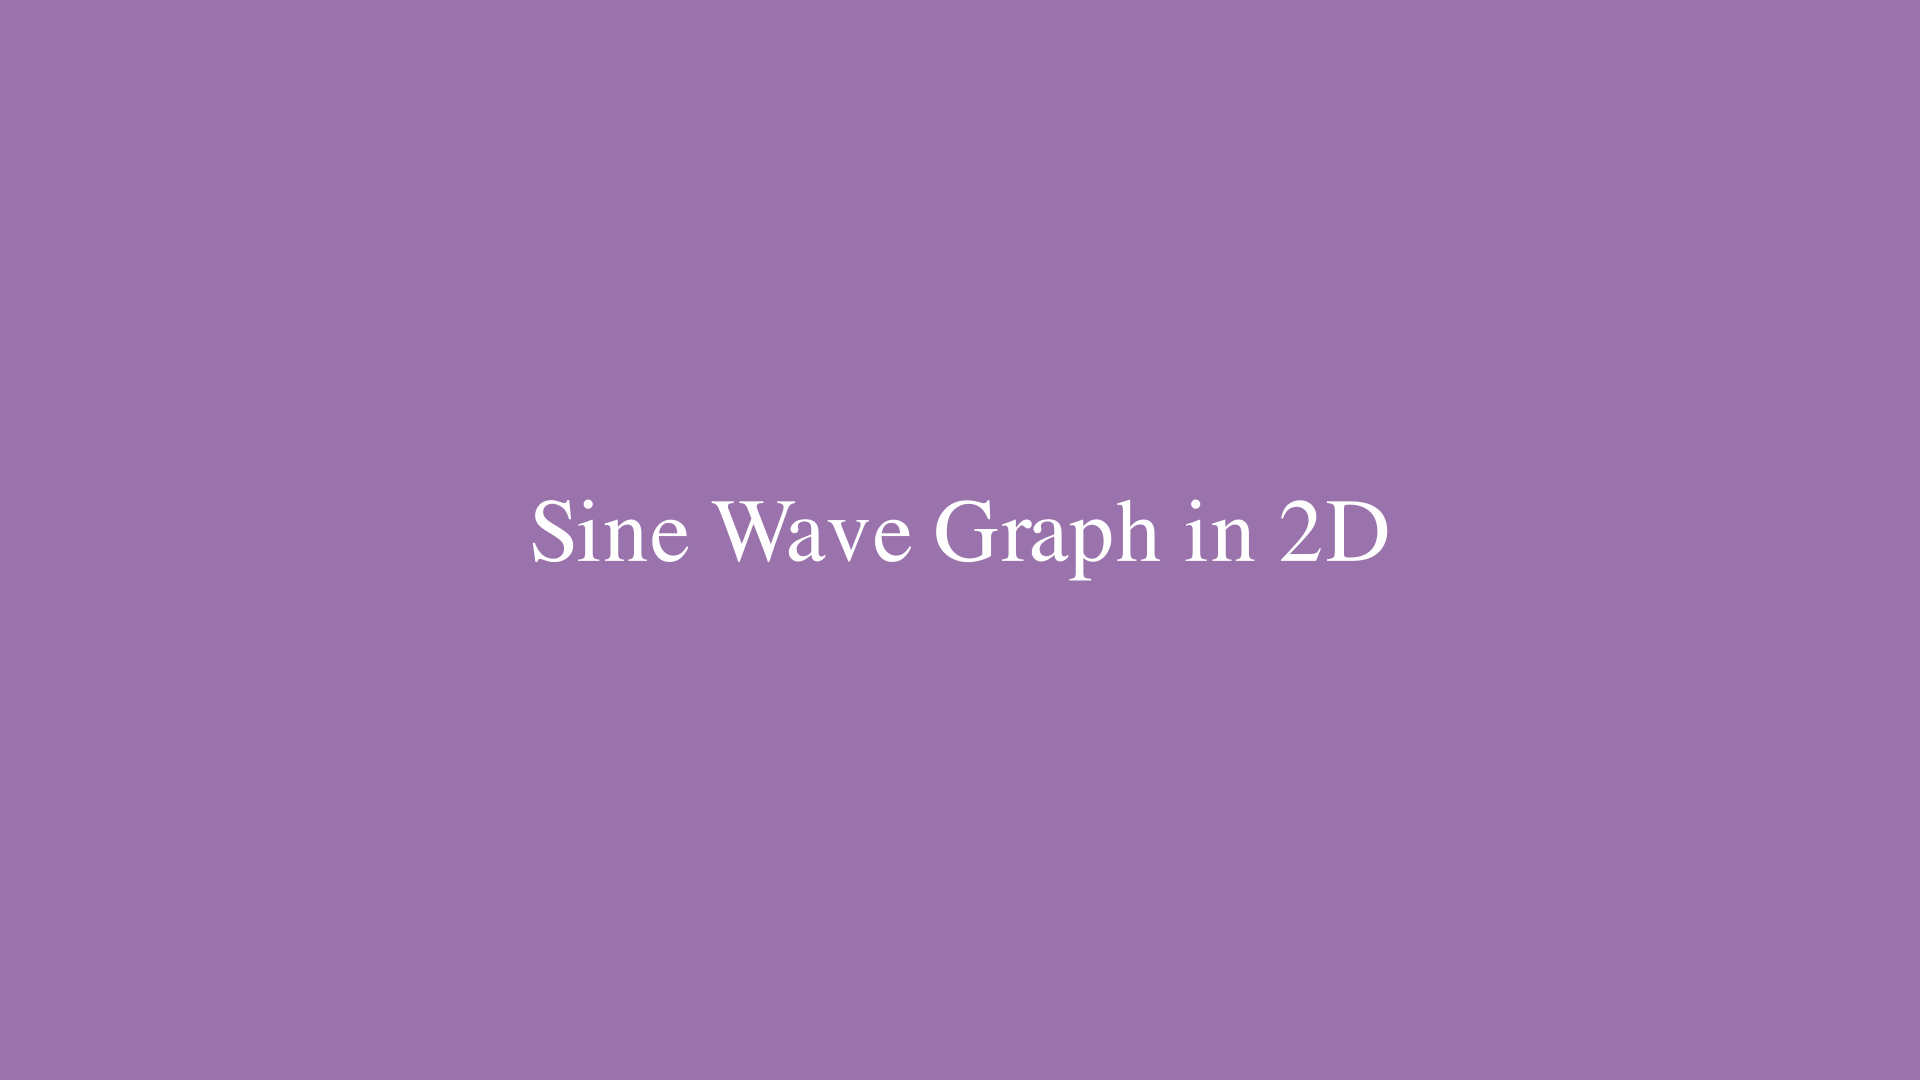

In [3]:
%%manim -qh -v WARNING MyText
#-v WARNING means that only warnings are shown in the log

class MyText(Scene):
    def construct(self):
        text = Text("Sine Wave Graph in 2D")
        self.add(text)

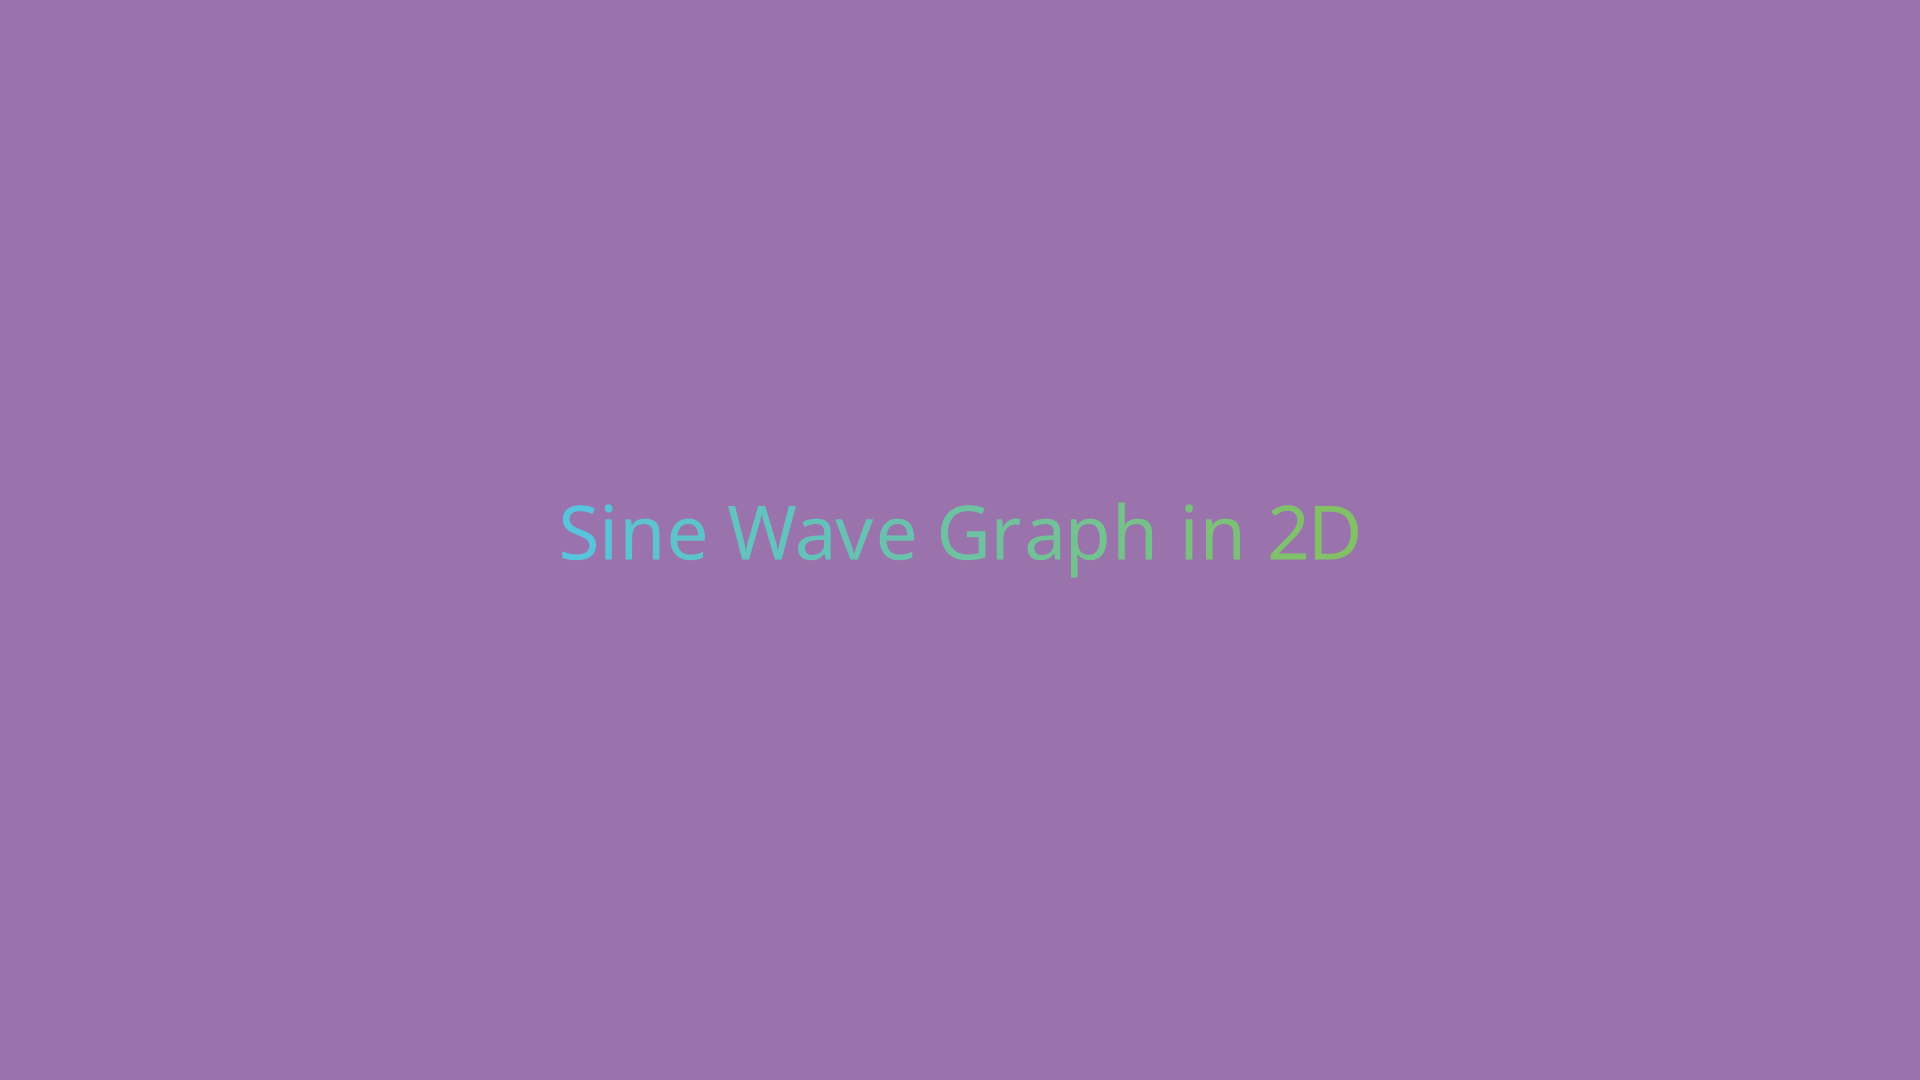

In [4]:
%%manim -qh -v WARNING FormattedText

class FormattedText(Scene):
    def construct(self):
        t = Text("Sine Wave Graph in 2D", font="Noto Sans", font_size=40, gradient=(BLUE, GREEN))
        self.add(t)

In [5]:
%%manim -qh -v WARNING AnimateText

class AnimateText(Scene):
    def construct(self):
        t = Text("Sine Wave Graph in 2D", font="Noto Sans", font_size=40, gradient=(BLUE, GREEN))
        self.play(Write(t), run_time=4)
        self.play(t.animate.to_edge(UP+RIGHT), run_time=4)

In [ ]:
%%manim -qh -v WARNING MathTeXDemo

class MathTeXDemo(Scene):
    def construct(self):
        mylatex = MathTex(r"{\sum_{i=0}^n i = \frac{n (n + 1)}{2}}")
        self.add(mylatex)

In [ ]:
%%manim -qh -v WARNING MathTeXDemo

class MathTeXDemo(Scene):
    def construct(self):
        mylatex = MathTex(
            r"{\sum_{i=0}^n i = \frac{n (n + 1)}{2}}")
        equation = MathTex(
            r"e^x = x^0 + x^1 + \frac{1}{2} x^2 + \frac{1}{6} x^3 + \cdots + \frac{1}{n!} x^n + \cdots"
        )
        self.add(VGroup(mylatex, equation).arrange(DOWN))

In [ ]:
%%manim -qh -v WARNING MathTeXDemo

class MathTeXDemo(Scene):
    def construct(self):
        mylatex = MathTex(
            r"{\sum_{i=0}^n i = \frac{n (n + 1)}{2}}")
        equation = MathTex(
            r"e^x = x^0 + x^1 + \frac{1}{2} x^2 + \frac{1}{6} x^3 + \cdots + \frac{1}{n!} x^n + \cdots"
        )
        self.play(Write(VGroup(mylatex, equation).arrange(DOWN)), run_time=8)

In [ ]:
%%manim -v WARNING -qh Graph2D

class Graph2D(Scene):
    def construct(self):
        
        # Math function
        def func(x):
            return np.sin(x)
        #Create Axes 
        #add_coordinates() creates label on axes
        axes = Axes(
            x_range=[-6, 6, 1],
            y_range=[-6, 6, 1],
            x_length=8,
            y_length=6).add_coordinates().scale(0.7)

        title = Text("Sine Graph in 2D", font_size=20)
        title.next_to(axes, UP)
        graph = axes.plot(func, x_range=[-6, 6, 1], color=YELLOW)
        labels = axes.get_axis_labels(Text("x-axis").scale(0.4), Text("y-axis").scale(0.4))
        
        #Animate 2D Graph
        self.play(Write(axes), Write(labels), Write (title))
        self.play(Write(graph), run_time=8)

In [ ]:
%%manim -v WARNING -qh Graph3D

class Graph3D(ThreeDScene):
    def construct(self):
        #Create Axes, title, graph and labels
        axes = ThreeDAxes(
            x_range=[-6, 6, 1],
            y_range=[-6, 6, 1],
            z_range=[-6, 6, 1],
            x_length=8,
            y_length=6,
            z_length=6,
        ).add_coordinates().scale(0.7)

        title = Text("Sine Graph in 3D", font_size=20)
        title.next_to(axes, UP)
        labels = axes.get_axis_labels(Tex("x-axis").scale(0.4), Text("y-axis").scale(0.4))        
        graph = axes.plot(lambda x: np.sin(x), x_range=[-6, 6, 1], color=YELLOW)

        #Draw these before rotation
        self.add(axes, labels, title)
        self.wait()

        #The camera is set to phi=0 and theta=-90 by default
        #Move camera to bring forward the desired angle
        self.move_camera(phi=60 * DEGREES)
        self.wait()
        self.move_camera(theta=-45 * DEGREES)

        #Start rotating 3d axes and creating graph simultaneously.
        #Rotates at a rate of radians per second
        self.begin_ambient_camera_rotation(
            rate=PI / 10, about="theta"
        )
        self.wait()
        self.play(Create(graph), run_time=3)
        #Stop rotation
        self.stop_ambient_camera_rotation()

In [ ]:
%%manim -v WARNING -qh FollowingCamera

class FollowingCamera(MovingCameraScene):
    def construct(self):
        # create the axes and the curve
        axes = Axes(
            x_range=[-6, 6, 1],
            y_range=[-6, 6, 1],
            x_length=8,
            y_length=6).add_coordinates().scale(0.7)
        title = Text("2D Sine Graph", font_size=20)
        title.next_to(axes, UP)
        labels = axes.get_axis_labels(Tex("x-axis").scale(0.4), Text("y-axis").scale(0.4)) 
        graph = axes.plot(lambda x: np.sin(x), color=BLUE, x_range=[-6, 6])

        # create dots based on the graph
        moving_dot = Dot(axes.i2gp(graph.t_min, graph), color=YELLOW)
        dot_1 = Dot(axes.i2gp(graph.t_min, graph))
        dot_2 = Dot(axes.i2gp(graph.t_max, graph))

        self.add(title, axes, graph, labels, dot_1, dot_2, moving_dot)
        self.play(self.camera.frame.animate.scale(0.5).move_to(moving_dot))

        def update_curve(mob):
            mob.move_to(moving_dot.get_center())

        self.camera.frame.add_updater(update_curve)
        #Do camera movement
        self.play(MoveAlongPath(moving_dot, graph, rate_func=linear), run_time=5)
        self.camera.frame.remove_updater(update_curve)